## Olympic Data Analysis Dashboard

### Overview

In this notebook, we will build an Olympic Data Analysis Dashboard using a dataset containing olympic data from year 1896 to year 2016. The dataset contains both summer and winter olympic data but we will only use summer olympic data only.

### Data Source

The dataset used in this project is sourced from kagle, which provides information about athletes such as their name, sex, age, height, weight, team (country they represented)	NOC (National Olympic Committees), games (it is the classification of summer and winter olympic with respective year), year, season (either summer or winter), city, sport, event, medal. We are also using NOC dataset to map the NOCs with their respective countries. Both the datasets contains a total of 2,71,116 rows before performing any operations on it.

### Approach

1. Data Cleaning: We will check for null and duplicate values while performing various analytical tasks.
2. Feature Engineering: We will extract different features at different time to perform different analytical task or to create various graphs or tables
3. Creating Graphs and Tables: We will create different types of graphs and tables to integrate with the dashboard for user to see.

Let's get started!

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [3]:
athlete_events = pd.read_csv('athlete_events.csv')
noc_regions = pd.read_csv('noc_regions.csv')

In [4]:
athlete_events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
noc_regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [6]:
athlete_events.shape

(271116, 15)

In [7]:
df = pd.merge(athlete_events, noc_regions, on='NOC',how='left')
df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace=True)
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       Region Notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [7]:
# Extracting only summer olympic data
df = df[df['Season'] == 'Summer']
df.shape

(222552, 17)

In [8]:
# We are not interested in athlete age, height, weight, and notes. Hence leaving the null values as it is.
# We are leaving region as it is very low in number, less than 0.5%
# We are leaving medal as the null value shows that the athlete hasn't won any medal
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
Region       370
Notes     218151
dtype: int64

In [9]:
df.duplicated().sum()

1385

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(221167, 17)

In [11]:
df.duplicated().sum()

0

In [12]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [13]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal       Region Notes  Bronze   Gold  \
0    Basketball Men's Basketball   NaN        China   NaN   False  False   
1   Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2        Football Men's Football   NaN      Denmark   NaN   False  False   
3    Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
26  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

    Silver  
0    False  
1    False  
2    False  
3    False  
26   False

In [14]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [15]:
medal_tally = medal_tally.groupby('Region').sum()[['Gold', 'Silver', 'Bronze']]
medal_tally = medal_tally.sort_values(by='Gold', ascending=False).reset_index()
medal_tally.head()

Region  Gold  Silver  Bronze
0      USA  1035     802     708
1   Russia   592     498     487
2  Germany   444     457     491
3       UK   278     317     300
4   France   234     256     287

In [16]:
medal_tally['Total'] = medal_tally[['Gold', 'Silver', 'Bronze']].sum(axis=1)

In [17]:
medal_tally.head()

Region  Gold  Silver  Bronze  Total
0      USA  1035     802     708   2545
1   Russia   592     498     487   1577
2  Germany   444     457     491   1392
3       UK   278     317     300    895
4   France   234     256     287    777

In [18]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')
years[0:20]

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976]

In [19]:
countries = df['Region'].dropna().unique().tolist()
countries.sort()
countries.insert(0, 'Overall')
countries[0:20]

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium']

In [20]:
medal_tally[medal_tally['Region'] == 'USA']

Region  Gold  Silver  Bronze  Total
0    USA  1035     802     708   2545

In [21]:
def extract_medal_tally(df, year='Overall', country='Overall'):
    flag = 0
    df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

    if year == 'Overall' and country != 'Overall':
        flag = 1
        df = df[df['Region'] == country]
    elif year != 'Overall' and country == 'Overall':
        df = df[df['Year'] == int(year)]
    elif year != 'Overall' and country != 'Overall':
        df = df[(df['Year'] == int(year)) & (df['Region'] == country)]

    if flag == 0:
        df = df.groupby('Region').sum()[['Gold', 'Silver', 'Bronze']].sort_values(by='Gold', ascending=False).reset_index()
    else:
        df = df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].reset_index()
        # df['Year'] = df['Year'].astype(int)
        df = df.sort_values(by='Year')

    df['Total'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)
    return df

In [22]:
year = 'Overall'
country = 'Australia'
temp_df = extract_medal_tally(df, year, country)

In [23]:
temp_df['Year'].min()

1896

## Section 2: Overall Analysis

#### Part 1: Extract the following (unique values)
- Edition (Year in df)
- Hosts (City in df)
- Sports
- Events
- Nations (Region in df)
- Athletes

In [24]:
edition = df['Year'].nunique() - 1
edition

28

In [25]:
host = df['City'].nunique()
host

23

In [26]:
sport = df['Sport'].nunique()
sport

52

In [27]:
event = df['Event'].nunique()
event

651

In [28]:
region = df['Region'].nunique()
region

205

In [29]:
athlete = df['Name'].nunique()
athlete

116122

In [30]:
def get_data_over_yrs(df, col):
    data_over_yrs = df.drop_duplicates(subset=['Year', col])['Year'].value_counts().reset_index().sort_values('Year')
    data_over_yrs.rename(columns={'Year': 'Edition', 'count': 'Number of ' + col}, inplace=True)
    return data_over_yrs

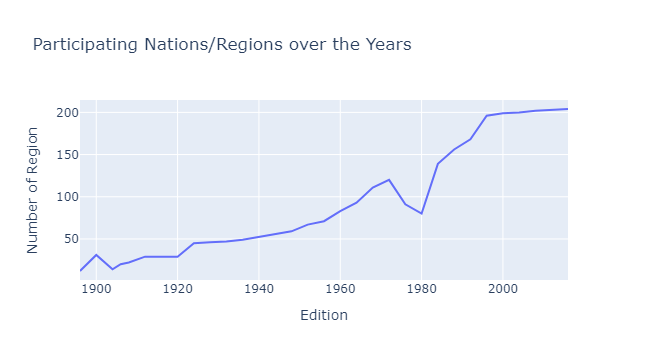

In [31]:
region_over_yrs = get_data_over_yrs(df, "Region")
fig = px.line(region_over_yrs, x="Edition", y="Number of Region", title='Participating Nations/Regions over the Years')
fig.show()

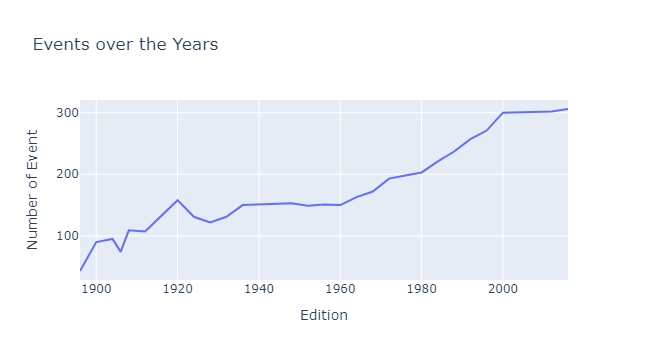

In [32]:
event_over_yrs = get_data_over_yrs(df, "Event")
fig = px.line(event_over_yrs, x='Edition', y='Number of Event', title='Events over the Years')
fig.show()

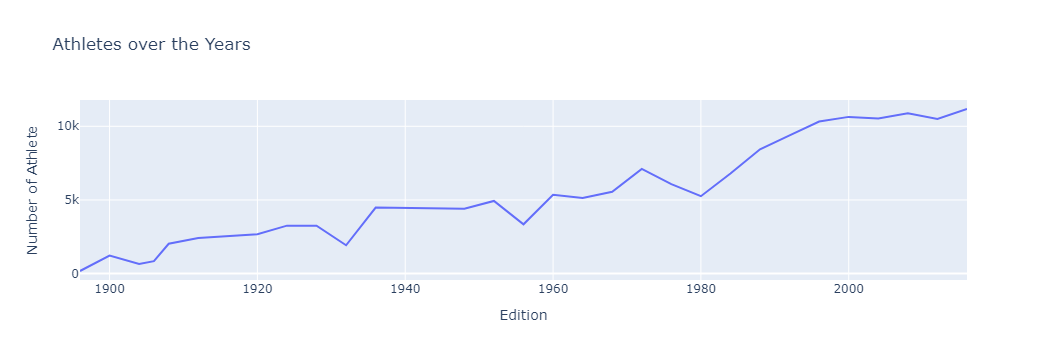

In [33]:
athlete_over_yrs = get_data_over_yrs(df, "Name")
fig = px.line(athlete_over_yrs, x='Edition', y='Number of Name', title='Athletes over the Years')
fig.update_layout(
    yaxis_title='Number of Athlete'
)
fig.show()

In [34]:
temp_df = df.drop_duplicates(['Year', 'Event'])[['Year', 'Sport', 'Event']].sort_values('Year')
temp_df = temp_df.groupby(['Year'])['Sport'].value_counts().reset_index()
temp_df.rename(columns={'count': 'Number of Events'}, inplace=True)
pivot_df = temp_df.pivot(index='Sport', columns='Year', values='Number of Events')
pivot_df.fillna(0, inplace=True)

In [35]:
pivot_df.head()

Year              1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  \
Sport                                                                          
Aeronautics        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Alpinism           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
Archery            0.0   8.0   6.0   0.0   3.0   0.0  10.0   0.0   0.0   0.0   
Art Competitions   0.0   0.0   0.0   0.0   0.0   5.0   5.0   5.0  13.0  13.0   
Athletics         12.0  23.0  24.0  21.0  26.0  30.0  29.0  27.0  27.0  29.0   

Year              ...  1980  1984  1988  1992  1996  2000  2004  2008  2012  \
Sport             ...                                                         
Aeronautics       ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Alpinism          ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Archery           ...   2.0   2.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   
Art Competitions  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Athletics         ...  38.0  41.0  42.0  43.0  44.0  46.0  46.0  47.0  47.0   

Year              2016  
Sport                   
Aeronautics        0.0  
Alpinism           0.0  
Archery            4.0  
Art Competitions   0.0  
Athletics         47.0  

[5 rows x 29 columns]

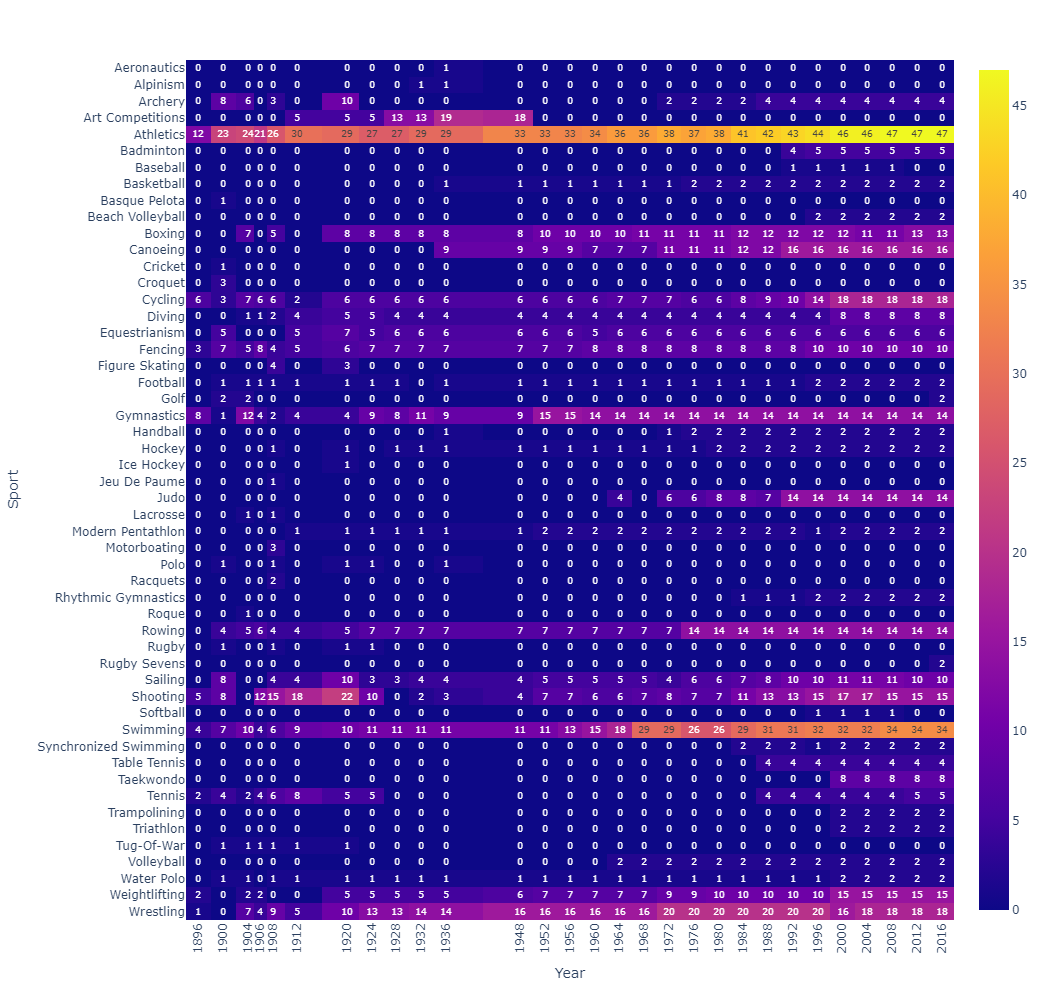

In [36]:
fig = px.imshow(pivot_df, x=pivot_df.columns, y=pivot_df.index, text_auto=True, width=1000, height=1000, aspect='auto')
fig.update_layout(xaxis = dict(
        tickmode='array',
        tickvals=pivot_df.columns,
        ticktext=[str(year) for year in pivot_df.columns],
        tickangle=-90
    ))
fig.show()

## Section 2: Country-wise Analysis

- Creating graph for Medals over the Years of Selected Country
- Creating graph for Medals over the Years for each Sport of Selected Country
- DataFrame consists of top 10 Athletes of Selected Country

In [361]:
temp_df = df[df['Region'] == 'USA']
temp_df = temp_df.drop_duplicates(subset=['Year', 'City', 'Sport', 'Event', 'Medal', 'NOC', 'Team', 'Games'])
# temp_df = temp_df.dropna(subset=['Medal'])
temp_df = temp_df.groupby('Year')['Medal'].count().reset_index().sort_values('Year')
temp_df

Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

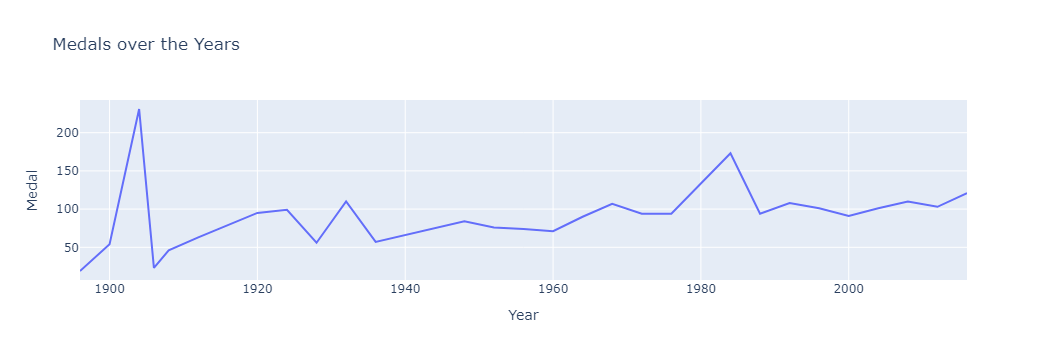

In [362]:
fig = px.line(temp_df, x='Year', y='Medal', title='Medals over the Years')
fig.show()

In [310]:
temp_df = df[df['Region'] == 'USA']
temp_df = temp_df.drop_duplicates(subset=['Year', 'City', 'Sport', 'Event', 'Medal', 'NOC', 'Team', 'Games'])
# temp_df = temp_df.dropna(subset=['Medal'])
temp_df = temp_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0)

In [311]:
temp_df.head()

Year              1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  \
Sport                                                                          
Archery            0.0   0.0  16.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
Art Competitions   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   7.0   
Athletics         16.0  39.0  65.0  22.0  33.0  41.0  29.0  32.0  25.0  35.0   
Badminton          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Baseball           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year              ...  1976  1984  1988  1992  1996  2000  2004  2008  2012  \
Sport             ...                                                         
Archery           ...   2.0   2.0   3.0   0.0   2.0   2.0   0.0   0.0   1.0   
Art Competitions  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Athletics         ...  22.0  40.0  26.0  30.0  23.0  16.0  25.0  23.0  28.0   
Badminton         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Baseball          ...   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   

Year              2016  
Sport                   
Archery            2.0  
Art Competitions   0.0  
Athletics         32.0  
Badminton          0.0  
Baseball           0.0  

[5 rows x 28 columns]

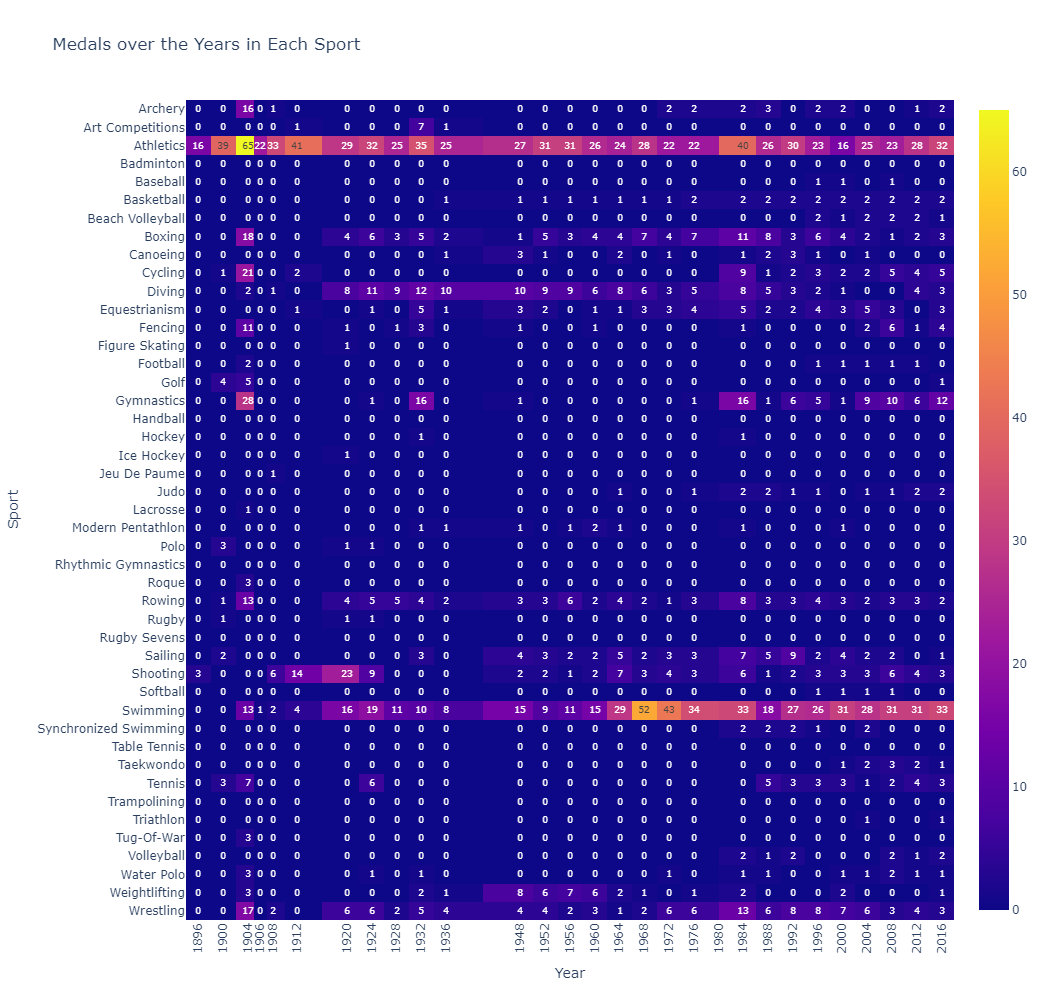

In [309]:
fig = px.imshow(temp_df, x=temp_df.columns, y=temp_df.index, text_auto=True, width=1000, height=1000, \
                aspect='auto', title='Medals over the Years in Each Sport')
fig.update_layout(xaxis = dict(
        tickmode='array',
        tickvals=pivot_df.columns,
        ticktext=[str(year) for year in pivot_df.columns],
        tickangle=-90
    ))
fig.show()

#### Rank the athletes based on the following criteria:

- Athlete with the most number of total medals will be ranked higher, but if two or more athlete tie then following rules will be applied to rank the athletes.
- If two or more athletes have the same total number of medals, the athlete with more gold medals will be ranked higher.
- If the gold medal counts are also the same, the athlete with more silver medals will be ranked higher.
- If both gold and silver medal counts are the same, the athlete with more bronze medals will be ranked higher.

In [264]:
sort_by = temp_df.columns
sort_by

['Medal']

In [318]:
temp_df = df[df['Region'] == 'Andorra']
temp_df = temp_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)
for medal in ['Gold', 'Silver', 'Bronze']:
    if medal not in temp_df.columns:
        temp_df[medal] = 0
temp_df['Medal'] = temp_df.sum(axis=1)
temp_df = temp_df.sort_values(by=['Medal', 'Gold', 'Silver', 'Bronze'], ascending=[False, False, False, False]).reset_index()
temp_df = temp_df.rename(columns={'Bronze': 'Bronze Medal', 'Gold': 'Gold Medal', 'Silver': 'Silver Medal', 'Medal': 'Total Medal'})
temp_df

Empty DataFrame
Columns: [Name, Gold Medal, Silver Medal, Bronze Medal, Total Medal]
Index: []

In [370]:
temp_df = df[df['Region'] == 'USA']
temp_df = temp_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)
for medal in ['Gold', 'Silver', 'Bronze']:
    if medal not in temp_df.columns:
        temp_df[medal] = 0
temp_df['Medal'] = temp_df.sum(axis=1)
temp_df = temp_df.sort_values(by=['Medal', 'Gold', 'Silver', 'Bronze'], ascending=[False, False, False, False]).reset_index()
temp_df = temp_df.rename(columns={'Bronze': 'Bronze Medal', 'Gold': 'Gold Medal', 'Silver': 'Silver Medal', 'Medal': 'Total Medal'})
temp_df = temp_df[['Name', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total Medal']][0:10]
temp_df

Medal                                             Name  Gold Medal  \
0                              Michael Fred Phelps, II          23   
1      Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)           8   
2                                   Ryan Steven Lochte           6   
3                 Dara Grace Torres (-Hoffman, -Minas)           4   
4                        Natalie Anne Coughlin (-Hall)           3   
5                                    Mark Andrew Spitz           9   
6                       Matthew Nicholas "Matt" Biondi           8   
7                                 Carl Townsend Osburn           5   
8                          Raymond Clarence "Ray" Ewry          10   
9                       Frederick Carlton "Carl" Lewis           9   

Medal  Silver Medal  Bronze Medal  Total Medal  
0                 3             2           28  
1                 3             1           12  
2                 3             3           12  
3                 4             4           12  
4                 4             5           12  
5                 1             1           11  
6                 2             1           11  
7                 4             2           11  
8                 0             0           10  
9                 1             0           10

In [248]:
# Df with only medal winning athletes
winner_df = df.dropna(subset=['Medal'])

In [249]:
winner_df = winner_df.dropna(subset=['Age'])

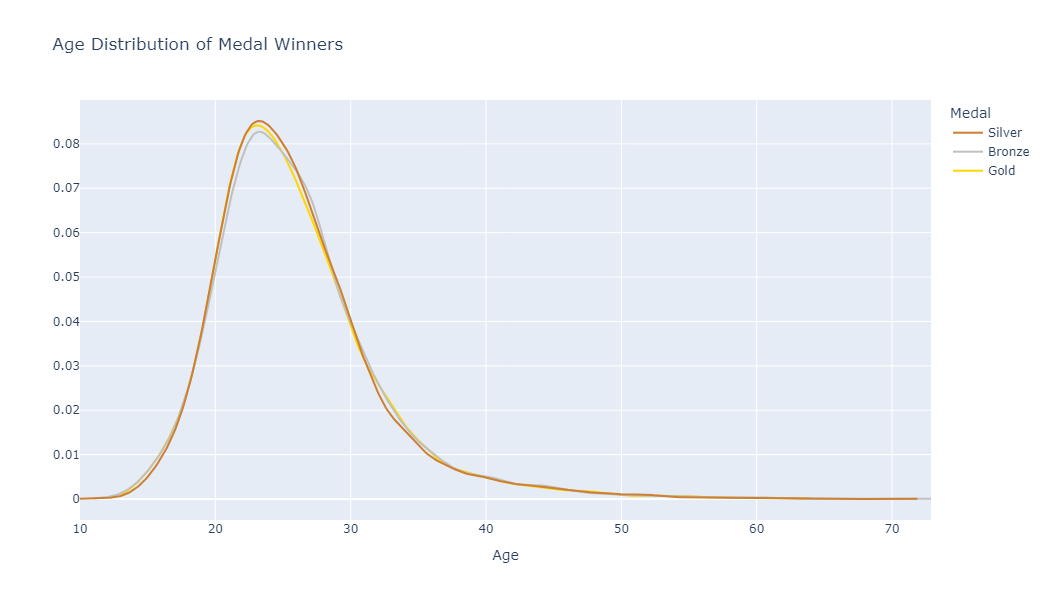

In [250]:
gold_winner_age = winner_df[winner_df['Medal'] == 'Gold']['Age'].tolist()
silver_winner_age = winner_df[winner_df['Medal'] == 'Silver']['Age'].tolist()
bronze_winner_age = winner_df[winner_df['Medal'] == 'Bronze']['Age'].tolist()
medals = winner_df['Medal'].unique().tolist()

fig = ff.create_distplot(
    [gold_winner_age, silver_winner_age, bronze_winner_age],
    medals,
    show_rug=False,
    show_hist=False,
    colors=['#FFD700', '#C0C0C0', '#CD7F32']
)
fig.update_layout(width=1000, height=600, legend_title_text='Medal', title_text='Age Distribution of Medal Winners')
fig.update_xaxes(title_text='Age')
fig.show()

In [211]:
def get_winners_age_bysport(df, sports):
    x = []
    sports_list = []
    for sport in sports:
        winners_age = df[df['Sport'] == sport]['Age'].tolist()
        if len(winners_age) > 5:
            # Only taking list with suitable data points to create kde
            x.append(winners_age)
            sports_list.append(sport)
    return {
        'winners_age': x,
        'sports_list': sports_list
    }

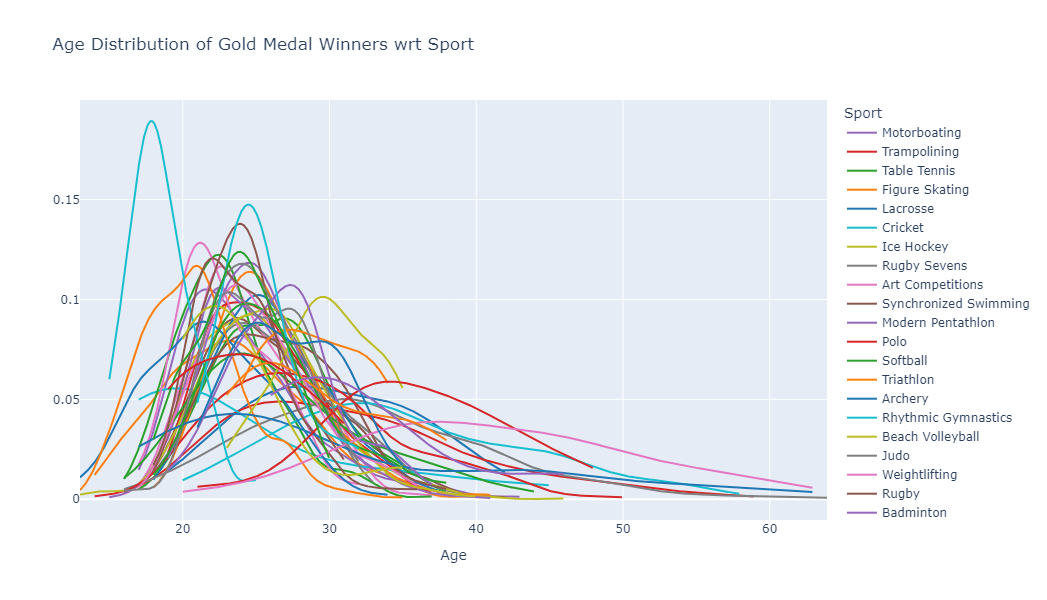

In [252]:
gold_winners_df = winner_df[winner_df['Medal'] == 'Gold']
sports_list = gold_winners_df['Sport'].unique().tolist()
# sports_list = ['Motorboating']
x = get_winners_age_bysport(gold_winners_df, sports_list)
fig = ff.create_distplot(
    x['winners_age'],
    x['sports_list'],
    show_rug=False,
    show_hist=False,
)
fig.update_layout(width=1000, height=600, legend_title_text='Sport', title_text='Age Distribution of Gold Medal Winners wrt Sport')
fig.update_xaxes(title_text='Age')
fig.show()

In [213]:
t = winner_df.shape[0]
h = winner_df.isnull().sum().tolist()[4]
w = winner_df.isnull().sum().tolist()[5]
print('% of height missing values: ', round((h/t)*100, 2))
print('% of weight missing values: ', round((w/t)*100, 2))
# Due to the significant amount of missing values, we will replace the missing data with the mean of each respective feature.
# This method is chosen for its simplicity and effectiveness in maintaining the dataset's integrity.

% of height missing values:  21.84
% of weight missing values:  23.36


In [214]:
h_mean = round(winner_df['Height'].mean(), 2)
w_mean = round(winner_df['Weight'].mean(), 2)
winner_df['Height'] = winner_df['Height'].replace(np.nan, h_mean)
winner_df['Weight'] = winner_df['Weight'].replace(np.nan, w_mean)

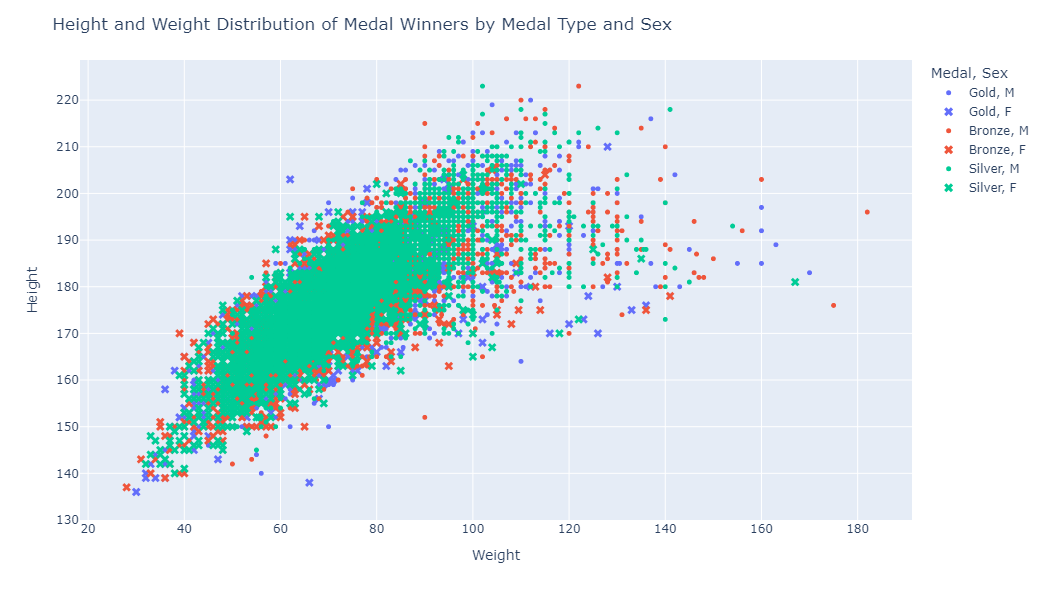

In [239]:
fig = px.scatter(winner_df, x='Weight', y='Height', color='Medal', symbol='Sex')
fig = go.Figure(fig)
for trace in fig.data:
    if trace.name.endswith('F'):
        trace.update(marker=dict(symbol='x', size=8))
    else:
        trace.update(marker=dict(symbol='circle', size=5))
fig.update_layout(width=1000, height=600, title_text='Height and Weight Distribution of Medal Winners by Medal Type and Sex')
fig.show()

In [253]:
mf = pd.get_dummies(df['Sex'])
yr_df = df['Year'].to_frame()
temp_df = pd.concat([yr_df, mf], axis=1)
temp_df = temp_df.groupby('Year').agg({'F': 'sum', 'M': 'sum'}).reset_index()
temp_df.columns = ['Year', 'Female', 'Male']
temp_df.head()

Year  Female  Male
0  1896       0   380
1  1900      33  1865
2  1904      16  1285
3  1906      11  1722
4  1908      47  3022

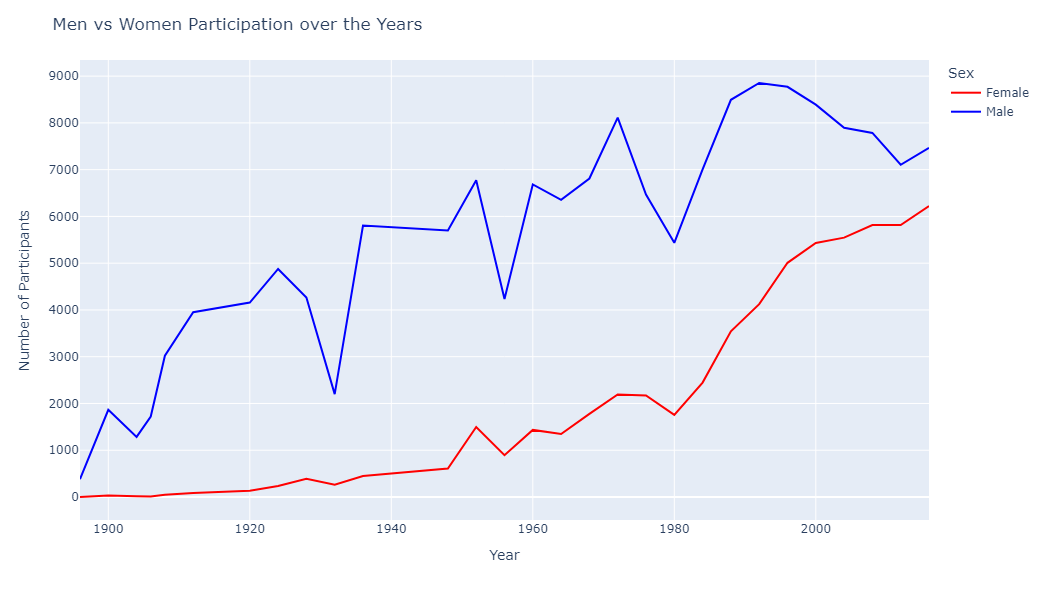

In [254]:
fig = px.line(temp_df, x='Year', y=['Female', 'Male'], labels={'value': 'Number of Participants', 'variable': 'Sex'},\
              color_discrete_sequence=['#FF0000', '#0000FF'])
fig.update_layout(width=1000, height=600, title_text='Men vs Women Participation over the Years')
fig.show()